In [81]:
#allow for autoreload of packages
%load_ext autoreload
%autoreload 2

import fresh as fresh
import recycle as recycle

from qiskit_ibm_runtime import QiskitRuntimeService 
from qiskit_ibm_runtime.fake_provider import FakeTorino
from qiskit.transpiler import generate_preset_pass_manager

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Retrieve backend

In [82]:

service = QiskitRuntimeService()
# backend = service.least_busy(
#     simulator=False, operational=True, min_num_qubits=100
# )
backend = FakeTorino()
print(f"Selected backend: {backend.name}")
#pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
 

Selected backend: fake_torino


# FRESH 

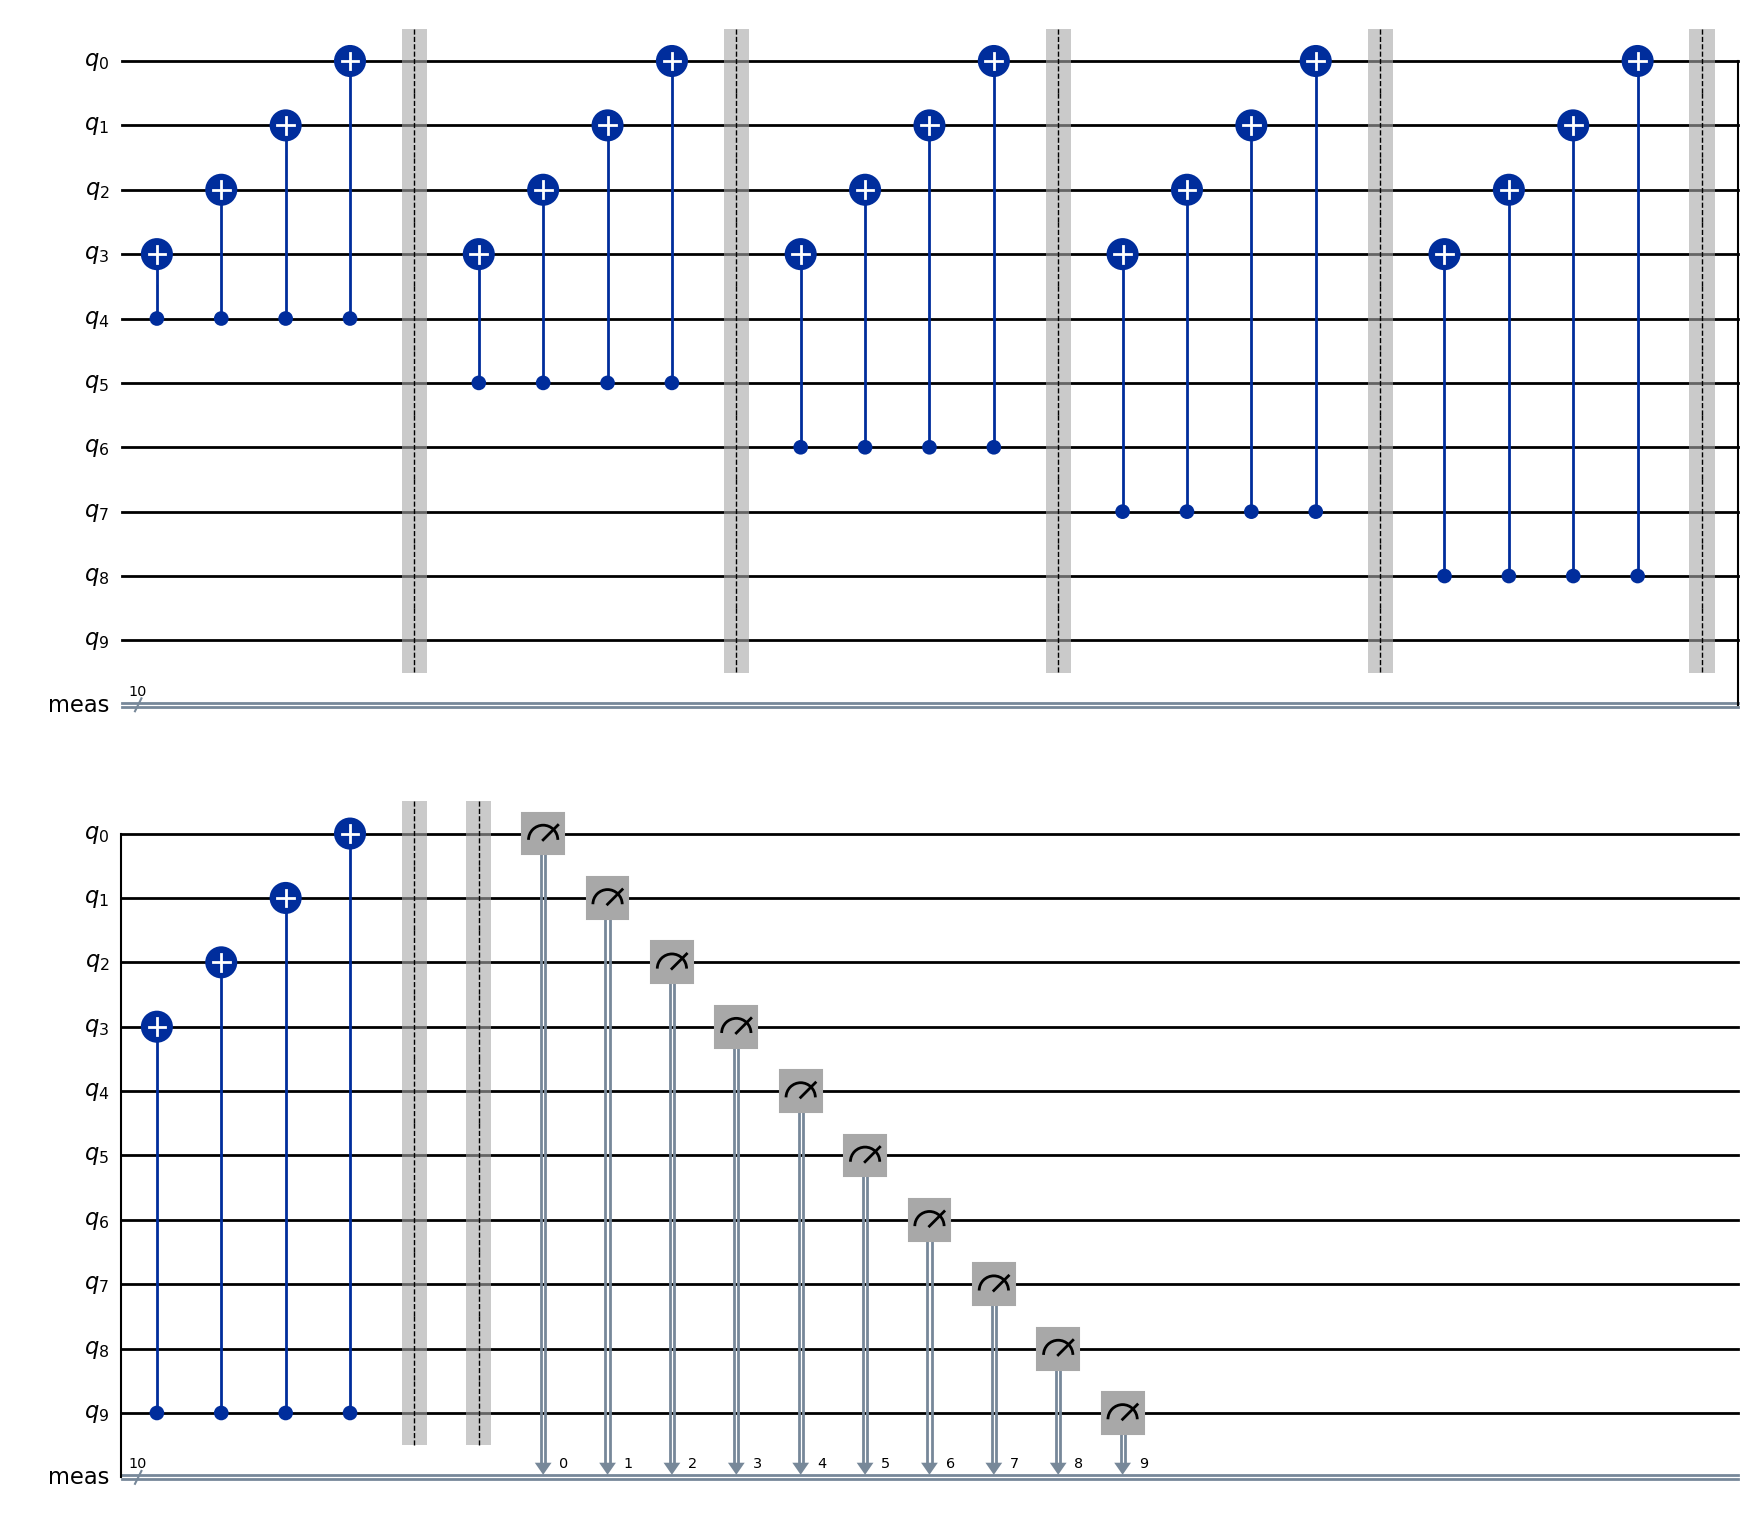

In [83]:
n=6
fresh_circ = fresh.generate_circuit(n=n)
fresh_circ.draw("mpl")

In [106]:
shots = 10000
iters = 7
results_0fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          type="fresh",
                                          optimization_level=0)

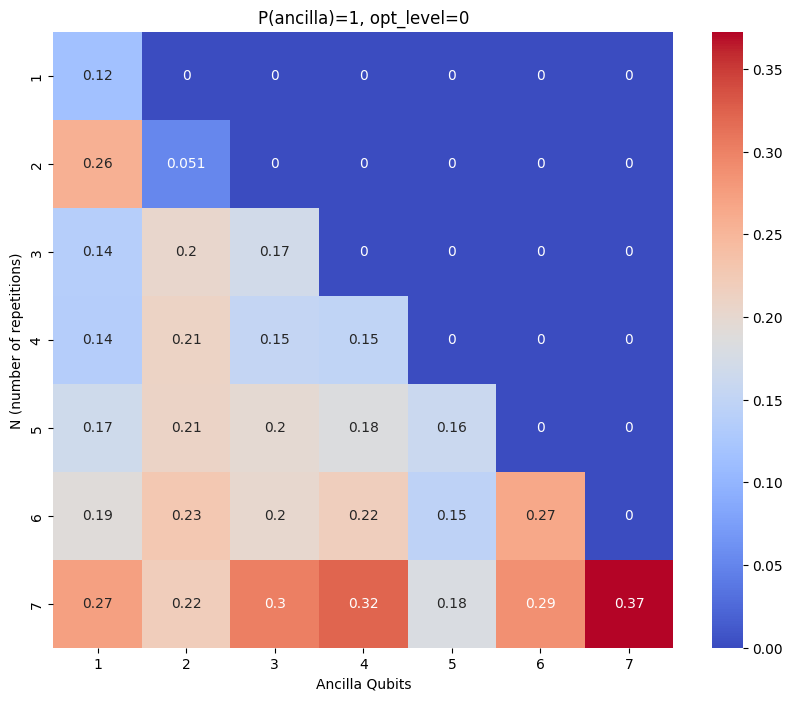

In [107]:
fresh.plot_heatmap(results_0fr, 0)

In [110]:
e0 = fresh.plag_error_rate(results_0fr, iters)
print(e0)

0.0367


In [112]:
opt_level = 1
results_1fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          type="fresh",
                                          optimization_level=opt_level)

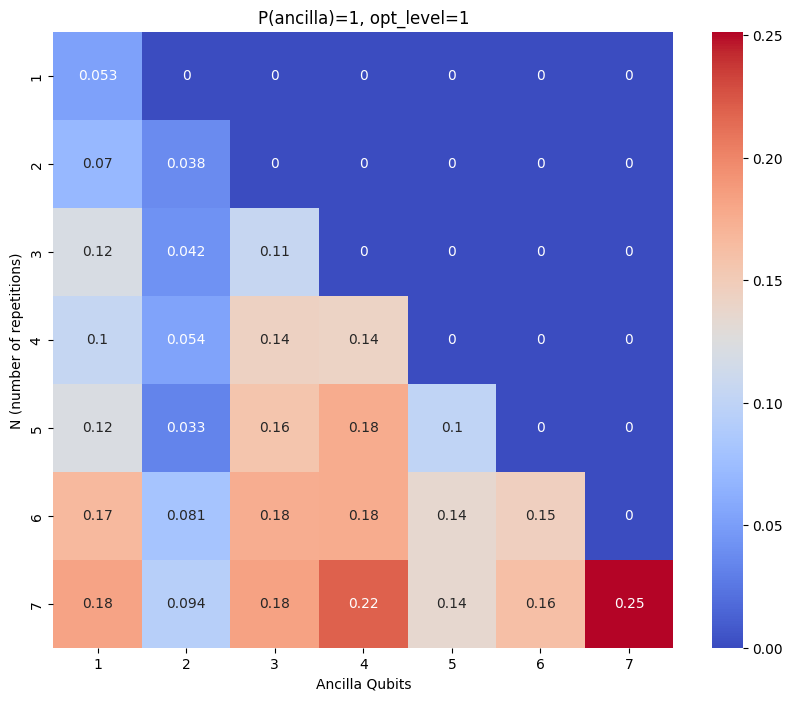

In [113]:
fresh.plot_heatmap(results_1fr, opt_level)

In [114]:
e1 = fresh.plag_error_rate(results_1fr, iters)
print(e1)

0.0284


In [115]:
opt_level = 2
results_2 = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          type="fresh",
                                          optimization_level=opt_level)

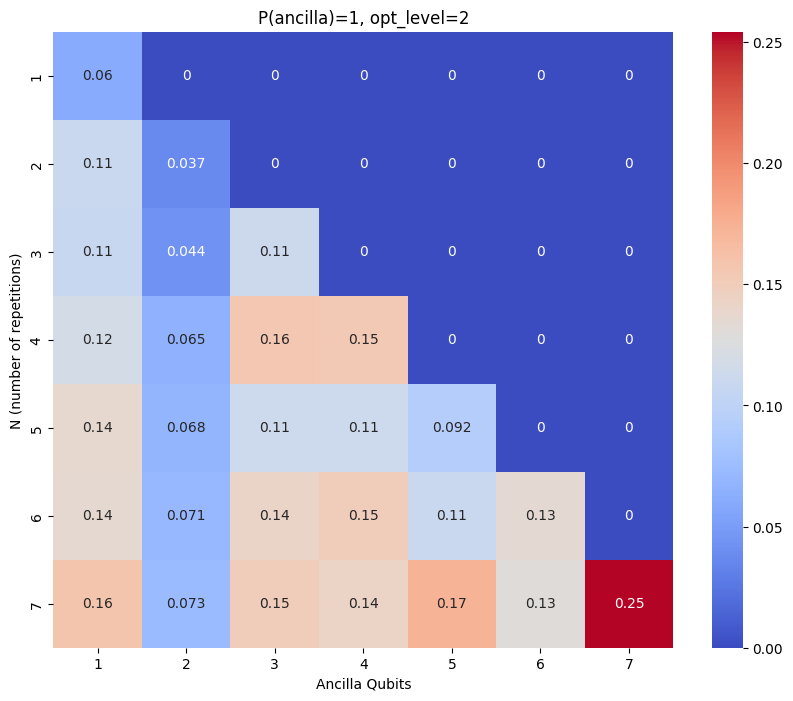

In [116]:
fresh.plot_heatmap(results_2, opt_level)

In [117]:
e2 = fresh.plag_error_rate(results_2, iters)
print(e2)

0.0277


In [118]:
opt_level = 3
results_3 = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          type="fresh",
                                          optimization_level=opt_level)

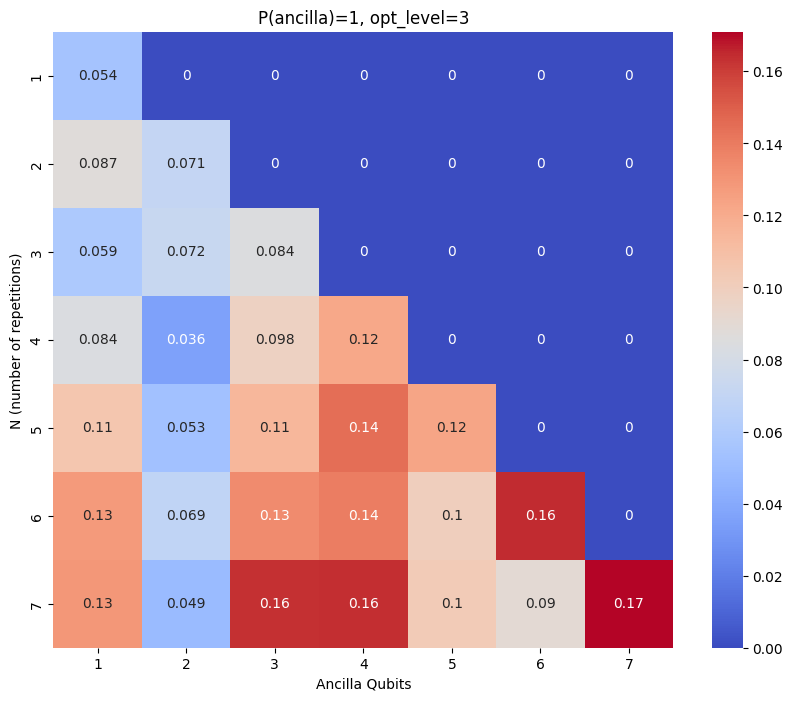

In [119]:
fresh.plot_heatmap(results_3, opt_level)


In [122]:
e3 = fresh.plag_error_rate(results_3, iters)
print(e3)

0.0167


# RECYCLE

In [125]:
shots = 10000
n = 7 
results_0re = recycle.get_ancilla_probabilities(iters=n, 
                                          shots=shots, 
                                          backend=backend,
                                          type="recycle",
                                          optimization_level=0)
print(results_0re)

[0.0585, 0.0666, 0.0873, 0.096, 0.121, 0.1355, 0.171]


/u/14/doh6/data/Documents/qt-native-gate-optimization/recycle.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


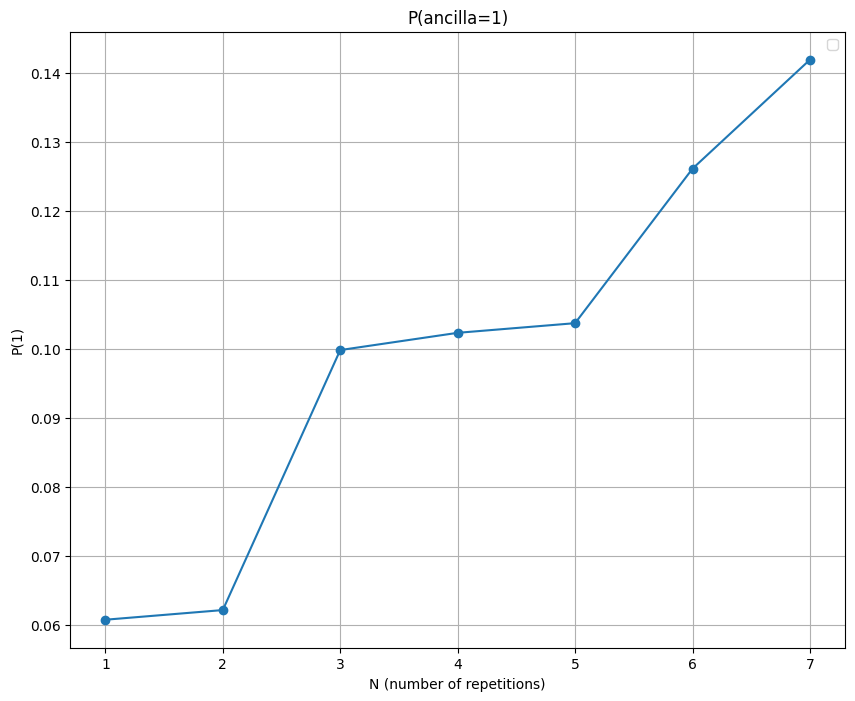

In [62]:
recycle.plot(results_0re)


In [63]:
corr = recycle.corr_err(results_0fr, results_0re, iters)
print(corr)

-0.13840000000000002
-0.14995000000000003
-0.1547055555555556
-0.1582805555555556
-0.1654165555555556
-0.17243322222222227
-0.024633317460317466


In [64]:
plag_recycle = recycle.plag_error_rate(corr,results_0re, iters)
print(plag_recycle)

0.0327


In [72]:
print(e1)

NameError: name 'e1' is not defined

In [68]:
results_1re = recycle.get_ancilla_probabilities(iters=n, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=1)
print(results_1re)



[0.024, 0.022, 0.0401, 0.0381, 0.0463, 0.0457, 0.0517]


/u/14/doh6/data/Documents/qt-native-gate-optimization/recycle.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


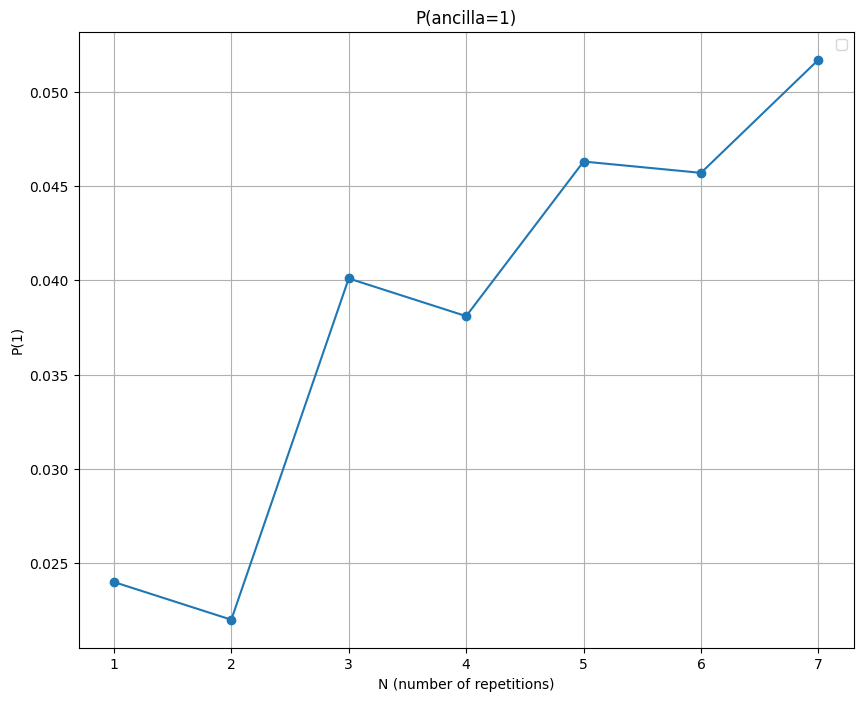

In [76]:
recycle.plot(results_1re)


In [78]:
corr = recycle.corr_err(results_1fr, results_1re, iters)
print(corr)


plag_recycle = recycle.plag_error_rate(corr,results_1re, iters)
print(plag_recycle)

-0.0477
-0.0594
-0.06625555555555555
-0.06969930555555555
-0.07260730555555554
-0.07772397222222222
-0.011103424603174603
0.0135
